In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import seaborn as sns
from tqdm.notebook import tqdm
from collections import namedtuple

from eval import read_run_dir
from new_eval import new_get_run_metrics, get_config, LoadInfo
from plot_utils import basic_plot

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

models_dir = Path("../models")
device = "cpu" # Set to "cuda" if needed

In [2]:
df = read_run_dir(models_dir)
df  # list all the runs in our run_dir

../models/soft_prompting/c048e08c-c0ce-4675-a344-a15e0497d4ef
../models/soft_prompting/738134a8-4ce7-4511-b12b-286661ca444c
../models/soft_prompting/fa639c10-14f4-48d7-a4d9-6af80dcebc2f
../models/soft_prompting/8f94cfa2-a055-4aa6-86b0-3f077db9219a
../models/kernel_linear_regression/bigger_model
../models/kernel_linear_regression/small-1-11-5M-steps
../models/lora/ee3104f0-1923-484e-a9fe-c09549a91c1d
../models/lora/5e345da7-7469-4e3f-808f-1c568467b51e
../models/lora/34f86826-cd70-4feb-800d-8fc840564a9a
['big_prompting_degree_5' 'big_prompting_shared'
 'chebyshev_linear_regression_toy' 'lora_full_degree_5'
 'lora_full_shared_roots' 'lora_small_full_degree_5'
 'normal_prompting_degree_5' 'normal_prompting_shared_roots']
                                 run_id                      task  \
2  fa639c10-14f4-48d7-a4d9-6af80dcebc2f            soft_prompting   
1  738134a8-4ce7-4511-b12b-286661ca444c            soft_prompting   
4                          bigger_model  kernel_linear_regression 

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
2,fa639c10-14f4-48d7-a4d9-6af80dcebc2f,soft_prompting,big_prompting_degree_5,basis_dim=5_degree=5,-1,-1,1,6,4,big_prompting_degree_5
1,738134a8-4ce7-4511-b12b-286661ca444c,soft_prompting,big_prompting_shared,basis_dim=5_degree=5,-1,-1,1,6,4,big_prompting_shared
4,bigger_model,kernel_linear_regression,Transformer-small,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,6,4,chebyshev_linear_regression_toy
5,small-1-11-5M-steps,kernel_linear_regression,Transformer-small,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,6,4,chebyshev_linear_regression_toy
8,34f86826-cd70-4feb-800d-8fc840564a9a,lora,lora_full_degree_5,basis_dim=5_degree=5,-1,-1,1,6,4,lora_full_degree_5
6,ee3104f0-1923-484e-a9fe-c09549a91c1d,lora,lora_full_shared_roots,basis_dim=5_degree=5,-1,-1,1,6,4,lora_full_shared_roots
7,5e345da7-7469-4e3f-808f-1c568467b51e,lora,lora_small_full_degree_5,basis_dim=5_degree=5,-1,-1,1,6,4,lora_small_full_degree_5
3,8f94cfa2-a055-4aa6-86b0-3f077db9219a,soft_prompting,normal_prompting_degree_5,basis_dim=5_degree=5,-1,-1,1,6,4,normal_prompting_degree_5
0,c048e08c-c0ce-4675-a344-a15e0497d4ef,soft_prompting,normal_prompting_shared_roots,basis_dim=5_degree=5,-1,-1,1,6,4,normal_prompting_shared_roots


../models/soft_prompting/fa639c10-14f4-48d7-a4d9-6af80dcebc2f/config.yaml
../models/lora/34f86826-cd70-4feb-800d-8fc840564a9a/config.yaml


/home/morten/anaconda3/envs/in-context-learning2/lib/python3.8/site-packages/peft/tuners/lora/layer.py:1059: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Non-tranaible parameters: 7656705
Trainable parameters: 172032
../models/lora/5e345da7-7469-4e3f-808f-1c568467b51e/config.yaml
Non-tranaible parameters: 7656705
Trainable parameters: 12288
../models/soft_prompting/8f94cfa2-a055-4aa6-86b0-3f077db9219a/config.yaml
../models/kernel_linear_regression/bigger_model/config.yaml


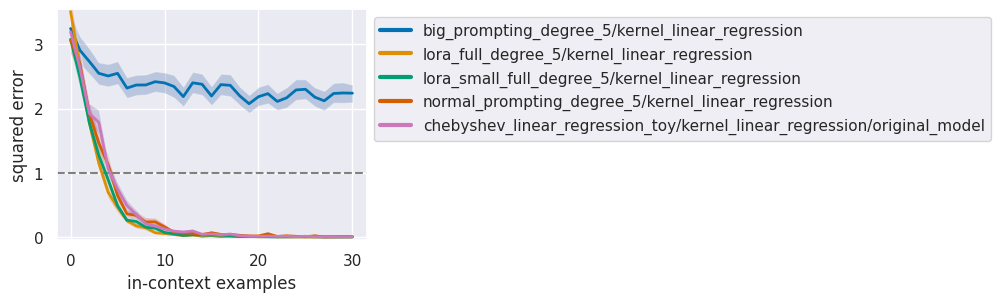

../models/soft_prompting/fa639c10-14f4-48d7-a4d9-6af80dcebc2f/config.yaml
../models/lora/34f86826-cd70-4feb-800d-8fc840564a9a/config.yaml
Non-tranaible parameters: 7656705
Trainable parameters: 172032
../models/lora/5e345da7-7469-4e3f-808f-1c568467b51e/config.yaml
Non-tranaible parameters: 7656705
Trainable parameters: 12288
../models/soft_prompting/8f94cfa2-a055-4aa6-86b0-3f077db9219a/config.yaml
../models/kernel_linear_regression/bigger_model/config.yaml


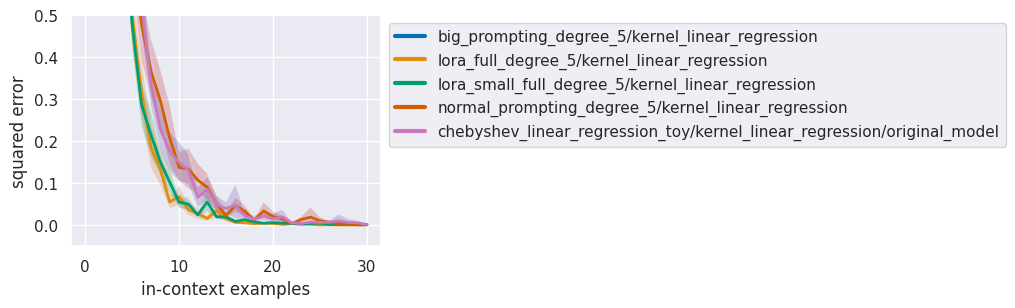

In [6]:
def plot_collection(load_info_collection: LoadInfo, device: str = "cuda", yhigh_lim: float = float('inf')):
    metrics = {}
    for path, step, alt_path, name_addon in load_info_collection:
        conf = get_config(path / "config.yaml")
        metrics[conf.wandb.name + "/" + conf.training.task + name_addon] = new_get_run_metrics(path, step=step, include_noise=False, device=device, alternative_train_conf_path=alt_path)
    
    basic_plot(metrics, yhigh_lim=yhigh_lim)
    plt.show()

big_prompt_deg_5 = LoadInfo(path=models_dir / "soft_prompting" / "fa639c10-14f4-48d7-a4d9-6af80dcebc2f", step=-1)
load_info_collection = [ big_prompt_deg_5,
                         LoadInfo(path=models_dir / "lora" / "34f86826-cd70-4feb-800d-8fc840564a9a", step=-1, 
                                  alternative_train_conf_path=big_prompt_deg_5.path / "config.yaml"),
                         LoadInfo(path=models_dir / "lora" / "5e345da7-7469-4e3f-808f-1c568467b51e", step=-1,
                                  alternative_train_conf_path=big_prompt_deg_5.path / "config.yaml"),
                         LoadInfo(path=models_dir / "soft_prompting" / "8f94cfa2-a055-4aa6-86b0-3f077db9219a", step=-1,
                                  alternative_train_conf_path=big_prompt_deg_5.path / "config.yaml"),
                         LoadInfo(path=models_dir / "kernel_linear_regression" / "bigger_model", step=-1,
                                  alternative_train_conf_path=big_prompt_deg_5.path / "config.yaml",
                                  name_addon="/original_model")]

plot_collection(load_info_collection, device=device)
plot_collection(load_info_collection, device=device, yhigh_lim=0.5)



../models/soft_prompting/738134a8-4ce7-4511-b12b-286661ca444c/config.yaml
../models/lora/ee3104f0-1923-484e-a9fe-c09549a91c1d/config.yaml
Non-tranaible parameters: 7656705
Trainable parameters: 172032
../models/soft_prompting/c048e08c-c0ce-4675-a344-a15e0497d4ef/config.yaml
../models/kernel_linear_regression/bigger_model/config.yaml


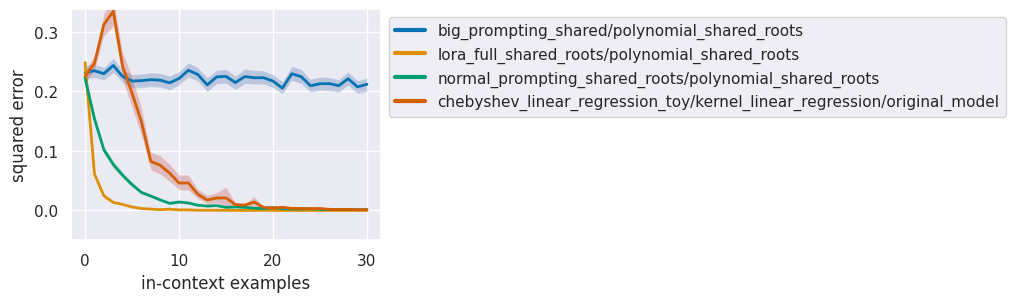

In [9]:

big_prompt_shared = LoadInfo(path=models_dir / "soft_prompting" / "738134a8-4ce7-4511-b12b-286661ca444c", step=-1)
load_info_collection = [ big_prompt_shared,
                         LoadInfo(path=models_dir / "lora" / "ee3104f0-1923-484e-a9fe-c09549a91c1d", step=-1,
                                  alternative_train_conf_path=big_prompt_shared.path / "config.yaml"),
                         LoadInfo(path=models_dir / "soft_prompting" / "c048e08c-c0ce-4675-a344-a15e0497d4ef", step=-1,
                                  alternative_train_conf_path=big_prompt_shared.path / "config.yaml"),
                         LoadInfo(path=models_dir / "kernel_linear_regression" / "bigger_model", step=-1,
                                  alternative_train_conf_path=big_prompt_shared.path / "config.yaml",
                                  name_addon="/original_model")]

plot_collection(load_info_collection, device=device)